In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("../datasets/iris.csv")

In [67]:
df.shape

(150, 5)

In [68]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target = le.fit_transform(df["species"])
species = df["species"].unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [73]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [74]:
features = df.iloc[:, df.columns != "species"]
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(features)
normalized_df = pd.DataFrame(normalized_data, columns=features.columns)
normalized_df

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [76]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.3, random_state=42
)

In [77]:
print(train_x.shape, test_x.size, train_y.shape, test_y.size)

(105, 4) 180 (105,) 45


In [78]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB()

In [79]:
prediction = gnb.predict(test_x)
prediction_proba = gnb.predict_proba(test_x)

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, prediction)

<Axes: >

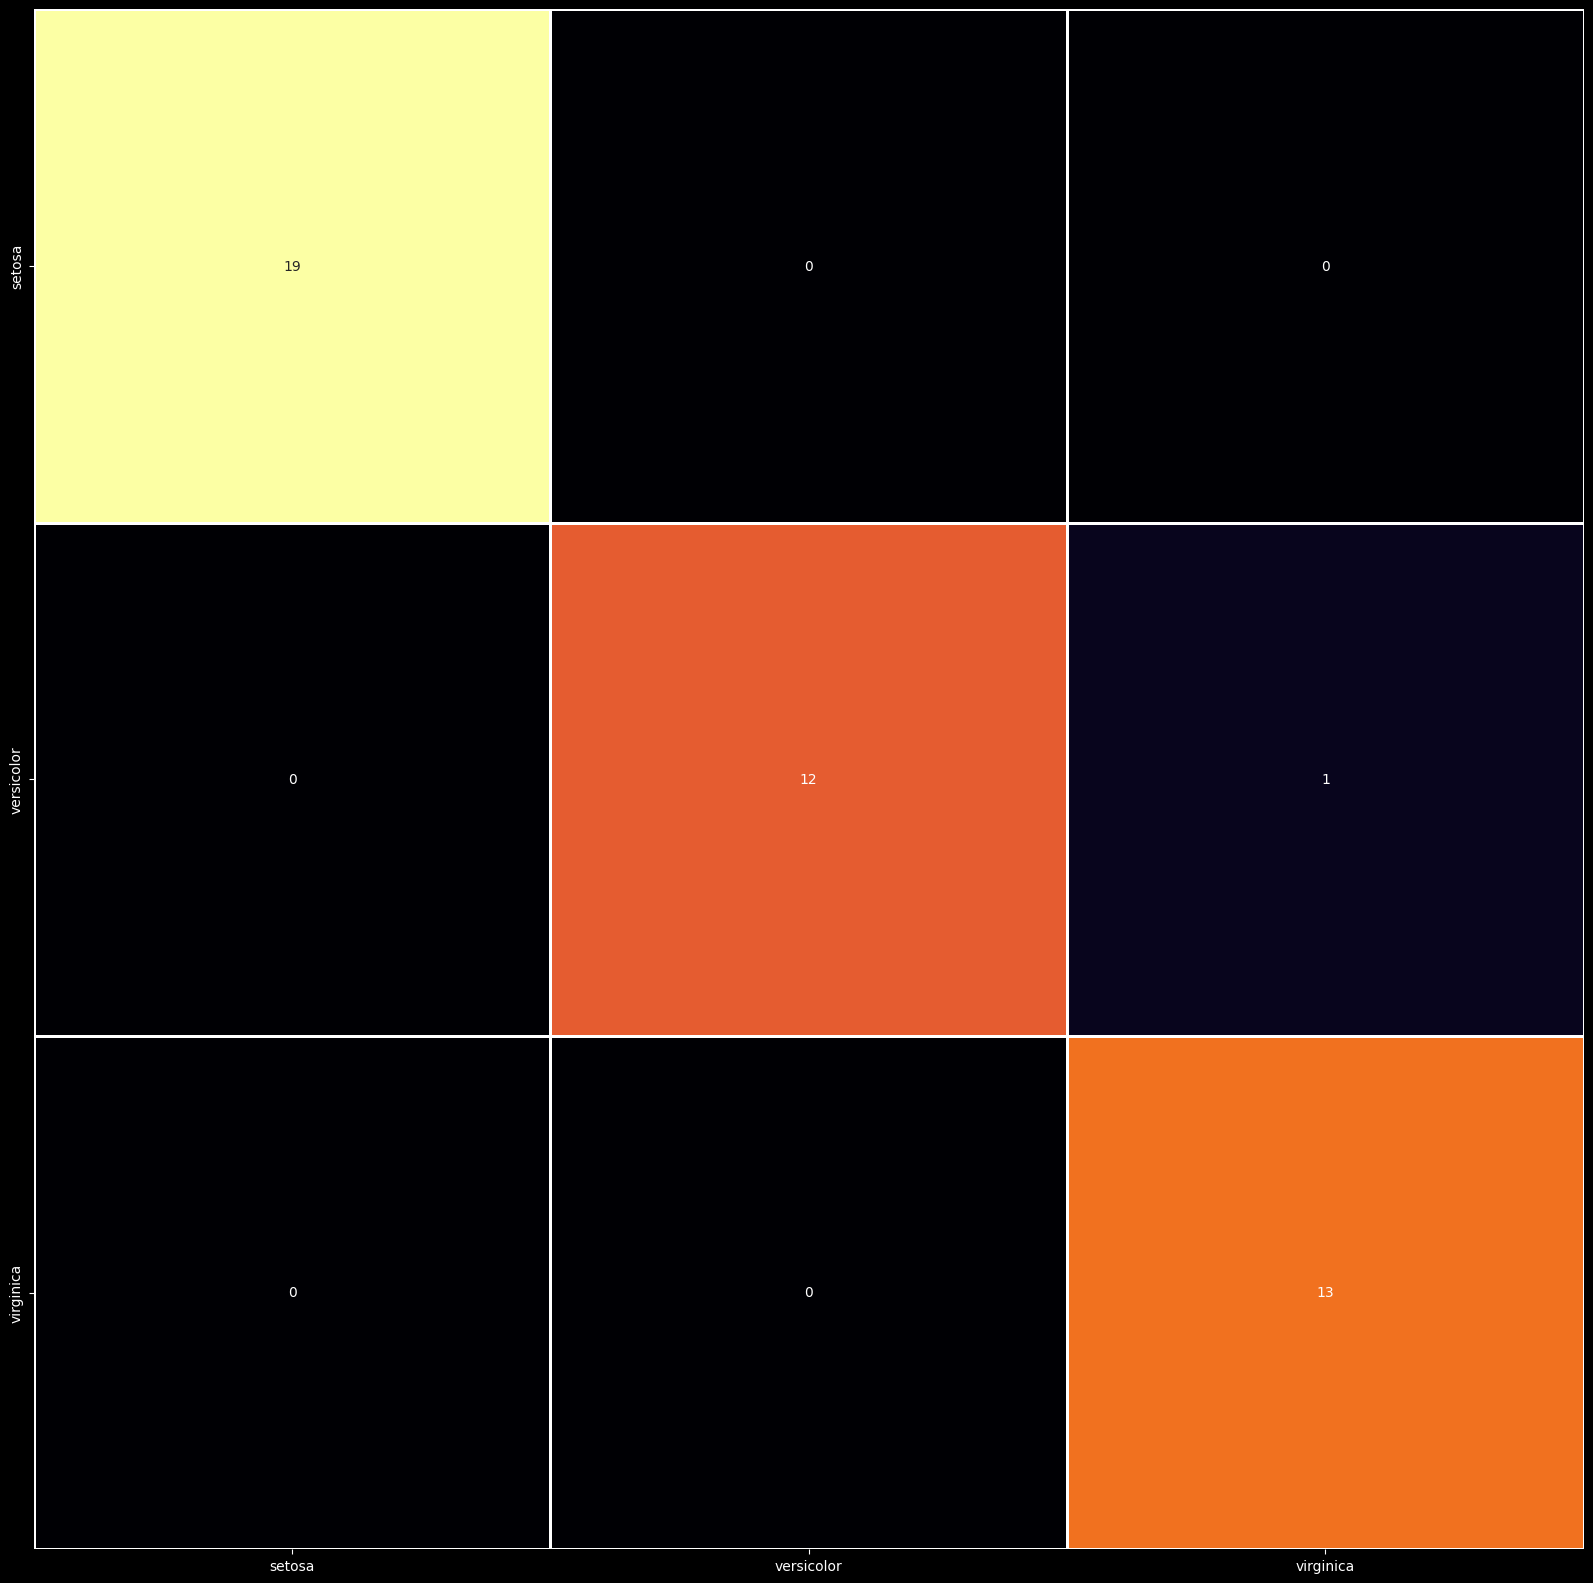

In [81]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    cm,
    cbar=False,
    annot=True,
    cmap="inferno",
    linecolor="white",
    linewidths=1,
    xticklabels=species,
    yticklabels=species,
)

In [82]:
from sklearn.metrics import log_loss, jaccard_score

stats_df = pd.DataFrame()
for i, label in enumerate(species):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP - FN - FP)

    accuracy = (TP + TN) / (TP + FP + FN + TN)
    error_rate = 1 - accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    log_loss_ = log_loss(test_y, prediction_proba)
    jaccard_score_ = jaccard_score(test_y, prediction, average="macro")

    f1_score = 2 * (recall * precision) / (recall + precision)

    label_stats = pd.DataFrame(
        {
            "Species": [label],
            "TP": [TP],
            "FP": [FP],
            "FN": [FN],
            "TN": [TN],
            "Accuracy": [accuracy],
            "Error Rate": [error_rate],
            "Precision": [precision],
            "Recall": [recall],
            "Log Loss": [log_loss_],
            "Jaccard Score": [jaccard_score_],
            "F1 Score": [f1_score],
        }
    )
    stats_df = pd.concat([stats_df, label_stats], axis=0, ignore_index=True)

In [83]:
stats_df

,Species,TP,FP,FN,TN,Accuracy,Error Rate,Precision,Recall,Log Loss,Jaccard Score,F1 Score
0,setosa,19,0,0,26,1.000000,0.000000,1.000000,1.000000,0.048964,0.950549,1.000000
1,versicolor,12,0,1,34,0.978723,0.021277,1.000000,0.923077,0.048964,0.950549,0.960000
2,virginica,13,1,0,33,0.978723,0.021277,0.928571,1.000000,0.048964,0.950549,0.962963


In [88]:
from sklearn.metrics import classification_report

report = classification_report(test_y, prediction, output_dict=True)
report_df = np.round(pd.DataFrame(report).transpose(), 2)
report_df

,precision,recall,f1-score,support
0,1.00,1.00,1.00,19.00
1,1.00,0.92,0.96,13.00
2,0.93,1.00,0.96,13.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.98,0.97,0.97,45.00
weighted avg,0.98,0.98,0.98,45.00
